# SLOPP + due-date + creel benchmark

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import sys,os
sys.path.append("../..")

In [17]:
from src.models.multi_bin_creel.lns.model import LnsMBMCreel
from src.extensions.creel.models.production_model_creel import ProductionModelCreel
from src.models.multi_bin_creel.anchor.model import AnchorSBMCreel
from src.models.multi_bin_creel.guillotine.model import GuillotineSBMCreel
from benchmarks.problem_json import ProblemJsonCM

from benchmarks.utils import run_multi_bin_benchmark

In [18]:
import json
f = open(os.path.join(os.getcwd(),"problems", "bench_color_small.json"))
data = json.load(f)

In [19]:
solver_models = [LnsMBMCreel, LnsMBMCreel]
production_models = [ProductionModelCreel, ProductionModelCreel]
single_bin_models = [GuillotineSBMCreel, AnchorSBMCreel]

args = {
    "nr_iterations": 2,
    "packing_timeout": 60*1,
    "production_timeout": 60 
}

In [20]:
problems = [
    (100,400),
]
nr_item_types = [4, 7, 10]
nr_colorss = [1]
nr_deadlines = [1, 3, 6]

[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b

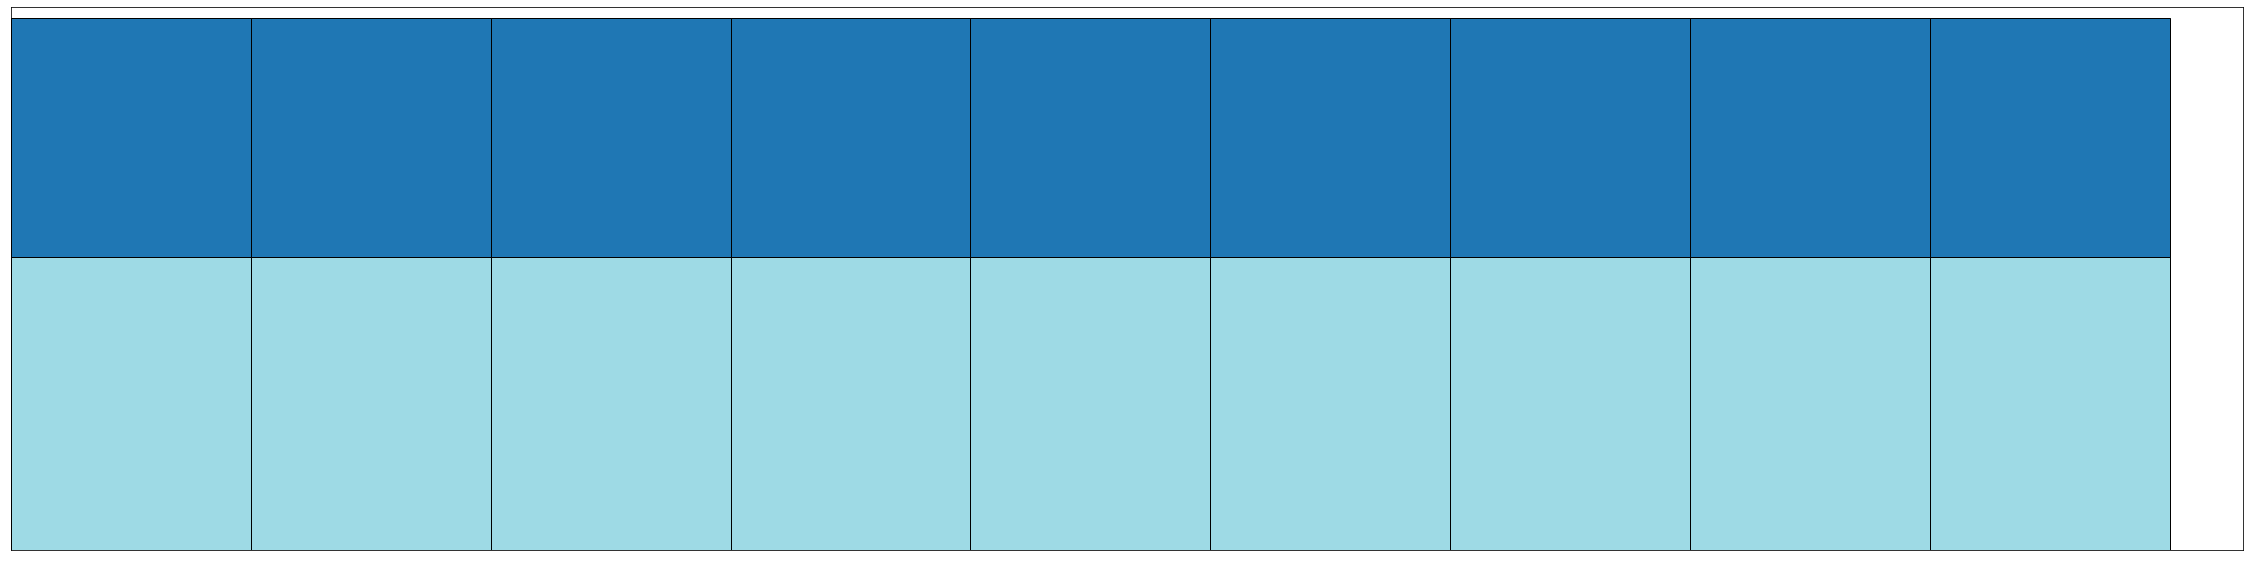

STATS: stats(objective=350890400, nr_variables=1, total_density=0.94815, constraints={'bin_active': {'nr_constraint': 2, 'creation_time': 0.0006386998575180769}, 'bin_order': {'nr_constraint': 1, 'creation_time': 0.00010489998385310173}, 'bin_starts': {'nr_constraint': 2, 'creation_time': 0.0006792999338358641}, 'bin_ends': {'nr_constraint': 1, 'creation_time': 0.0004468001425266266}, 'deadline_capacity': {'nr_constraint': 1, 'creation_time': 0.000260799890384078}, 'unique_new_bin': {'nr_constraint': 0, 'creation_time': 5.600042641162872e-06}, 'symmetry_breaking': {'nr_constraint': 0, 'creation_time': 2.600019797682762e-06}, 'usefull_bin': {'nr_constraint': 1, 'creation_time': 2.759997732937336e-05}}, constraint_time=0.0021662998478859663, transfer_time=7.812465399969369, solve_time=60.53284149989486, total_time=69.65827859984711, nr_solutions=1, deadlines=[50], deadline_betweens=[51], solution_repeats=[[47]], solution_starts=[[0]], solution_ends=[[46]], solution_active=[[True]], bins=

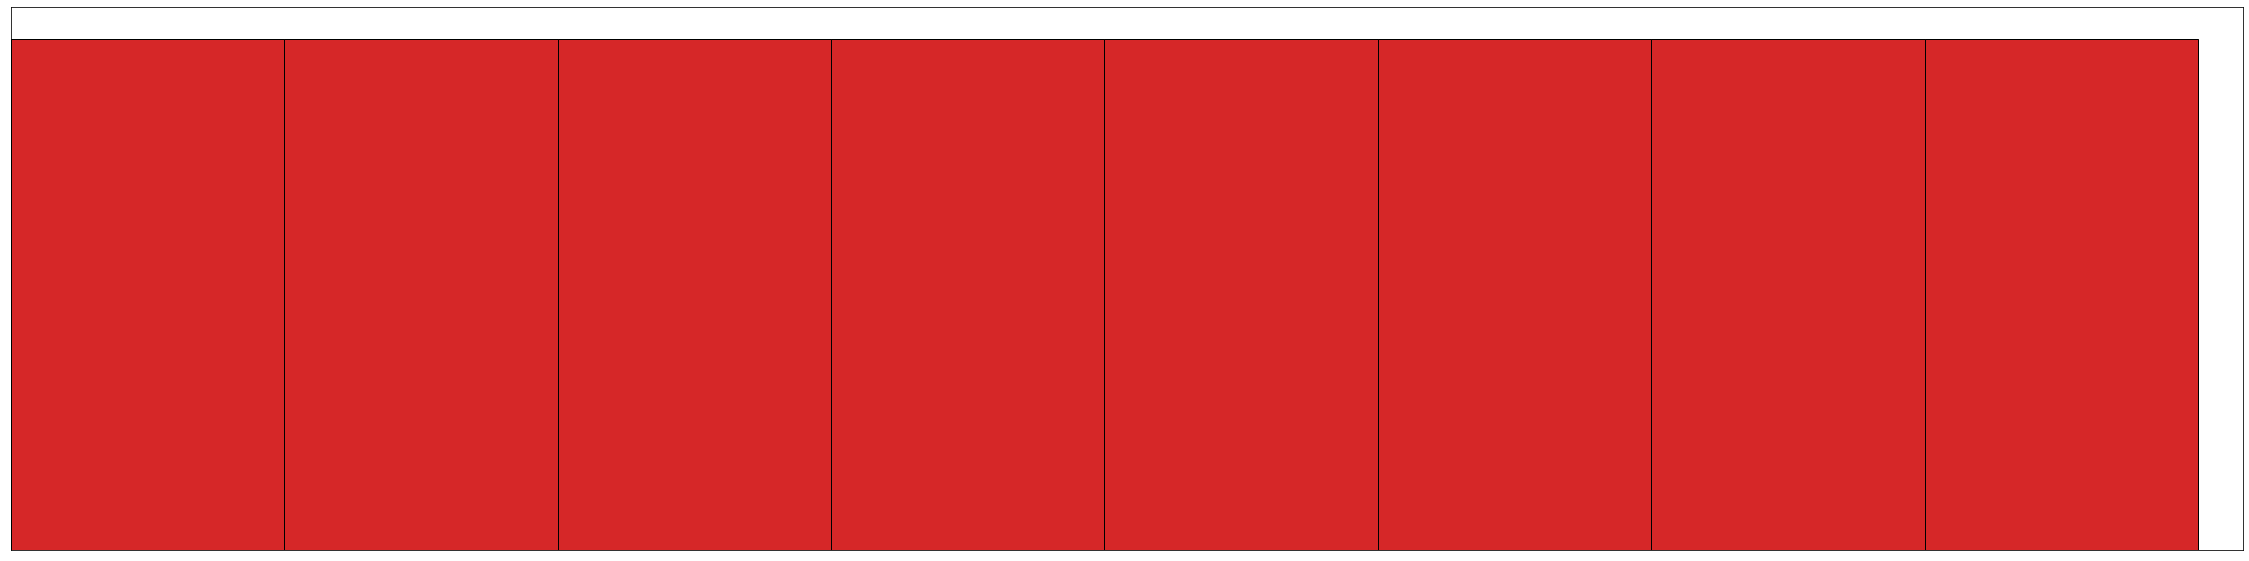

STATS: stats(objective=350527200, nr_variables=2, total_density=0.9454550000000002, constraints={'bin_active': {'nr_constraint': 2, 'creation_time': 0.00107150012627244}, 'bin_order': {'nr_constraint': 3, 'creation_time': 0.0007074999157339334}, 'bin_starts': {'nr_constraint': 4, 'creation_time': 0.0019324999302625656}, 'bin_ends': {'nr_constraint': 2, 'creation_time': 0.0009045000188052654}, 'deadline_capacity': {'nr_constraint': 2, 'creation_time': 0.00043340004049241543}, 'unique_new_bin': {'nr_constraint': 1, 'creation_time': 0.0004227000754326582}, 'symmetry_breaking': {'nr_constraint': 0, 'creation_time': 2.9997900128364563e-06}, 'usefull_bin': {'nr_constraint': 1, 'creation_time': 2.8900103643536568e-05}}, constraint_time=0.005504000000655651, transfer_time=8.289411299861968, solve_time=60.610268800053746, total_time=69.89165499992669, nr_solutions=2, deadlines=[50], deadline_betweens=[51], solution_repeats=[[36], [4]], solution_starts=[[14], [0]], solution_ends=[[49], [3]], sol

In [21]:
for minutes in [1]:
    for nr_item_type in nr_item_types:
        for problem in problems:
            for nr_colors in nr_colorss:

                x, y = problem

                file_name = str(nr_item_type) + "_" + str(x) + "_" + str(y) + "_" + str(nr_colors)

                f = open(os.path.join(os.getcwd(), "problems", "1_3_6", file_name + ".json"))
                data = json.load(f)
                
                a = (ProblemJsonCM.init_from_file(data))
                b = [c for c in a if len(c.deadlines) in nr_deadlines]

                run_multi_bin_benchmark(solver_models, production_models, single_bin_models, b, args=args)